In [190]:
## Importing all required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
## Reading the csv file
earthquake_data = pd.read_csv('all_month.csv')

In [69]:
## Obtaining sample of first 5 values
earthquake_data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-24T02:32:24.208Z,60.240700,-151.038500,54.60,1.10,ml,NaN,NaN,NaN,0.52,...,2023-09-24T02:34:28.879Z,"Kenai Peninsula, Alaska",earthquake,NaN,1.60,NaN,NaN,automatic,ak,ak
1,2023-09-24T02:32:04.780Z,38.822334,-122.850998,-0.63,0.65,md,10.0,123.0,0.02171,0.21,...,2023-09-24T02:33:39.590Z,"10 km WNW of The Geysers, CA",earthquake,0.51,2.40,0.340,8.0,automatic,nc,nc
2,2023-09-24T02:25:52.951Z,59.845400,-152.259600,85.80,1.50,ml,NaN,NaN,NaN,0.29,...,2023-09-24T02:28:10.637Z,"25 km WNW of Anchor Point, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
3,2023-09-24T02:22:34.663Z,58.249700,-155.080200,1.20,1.10,ml,NaN,NaN,NaN,0.32,...,2023-09-24T02:24:37.701Z,"84 km NNW of Karluk, Alaska",earthquake,NaN,1.50,NaN,NaN,automatic,ak,ak
4,2023-09-24T02:07:25.788Z,31.020400,141.875300,10.00,4.50,mb,31.0,136.0,5.92800,0.65,...,2023-09-24T02:26:52.040Z,"Izu Islands, Japan region",earthquake,12.91,1.92,0.127,18.0,reviewed,us,us


In [126]:
## Converting to datetime
earthquake_data['time'] = pd.to_datetime(earthquake_data['time'])

In [127]:
## Checking the new time
earthquake_data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-24 02:32:24.208000+00:00,60.240700,-151.038500,54.60,1.10,ml,16.0,99.0,0.06157,0.52,...,2023-09-24T02:34:28.879Z,"Kenai Peninsula, Alaska",earthquake,0.44,1.60,0.165206,10.0,automatic,ak,ak
1,2023-09-24 02:32:04.780000+00:00,38.822334,-122.850998,-0.63,0.65,md,10.0,123.0,0.02171,0.21,...,2023-09-24T02:33:39.590Z,"10 km WNW of The Geysers, CA",earthquake,0.51,2.40,0.340000,8.0,automatic,nc,nc
2,2023-09-24 02:25:52.951000+00:00,59.845400,-152.259600,85.80,1.50,ml,16.0,99.0,0.06157,0.29,...,2023-09-24T02:28:10.637Z,"25 km WNW of Anchor Point, Alaska",earthquake,0.44,0.50,0.165206,10.0,automatic,ak,ak
3,2023-09-24 02:22:34.663000+00:00,58.249700,-155.080200,1.20,1.10,ml,16.0,99.0,0.06157,0.32,...,2023-09-24T02:24:37.701Z,"84 km NNW of Karluk, Alaska",earthquake,0.44,1.50,0.165206,10.0,automatic,ak,ak
4,2023-09-24 02:07:25.788000+00:00,31.020400,141.875300,10.00,4.50,mb,31.0,136.0,5.92800,0.65,...,2023-09-24T02:26:52.040Z,"Izu Islands, Japan region",earthquake,12.91,1.92,0.127000,18.0,reviewed,us,us


In [174]:
## Removing null values
earthquake_data.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2346
gap                2346
dmin               3794
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2971
depthError            1
magError           2379
magNst             2356
status                0
locationSource        0
magSource             0
dtype: int64

In [175]:
## Replacing null values
earthquake_data['mag'] = earthquake_data['mag'].replace({'':np.nan})

In [73]:
## Replacing null values
earthquake_data.replace(to_replace = {column: {'':np.nan, None:np.nan} for column in earthquake_data.columns}, inplace = True)

In [177]:
## Replacing null values with the median as it is deemed most suitable
earthquake_data['mag'] = earthquake_data['mag'].fillna(earthquake_data['mag'].median())
earthquake_data['nst'] = earthquake_data['nst'].fillna(earthquake_data['nst'].median())
earthquake_data['gap'] = earthquake_data['gap'].fillna(earthquake_data['gap'].median())
earthquake_data['dmin'] = earthquake_data['dmin'].fillna(earthquake_data['dmin'].median())
earthquake_data['horizontalError'] = earthquake_data['horizontalError'].fillna(earthquake_data['horizontalError'].median())
earthquake_data['magError'] = earthquake_data['magError'].fillna(earthquake_data['magError'].median())
earthquake_data['magNst'] = earthquake_data['magNst'].fillna(earthquake_data['magNst'].median())
earthquake_data['depthError'] = earthquake_data['depthError'].fillna(earthquake_data['depthError'].median())

In [178]:
## Checking null values have been removed
earthquake_data.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            1
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [179]:
## Checking if null values have been replaced by checking the first 5
earthquake_data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-24T02:32:24.208Z,60.240700,-151.038500,54.60,1.10,ml,16.0,99.0,0.06157,0.52,...,2023-09-24T02:34:28.879Z,"Kenai Peninsula, Alaska",earthquake,0.44,1.60,0.165206,10.0,automatic,ak,ak
1,2023-09-24T02:32:04.780Z,38.822334,-122.850998,-0.63,0.65,md,10.0,123.0,0.02171,0.21,...,2023-09-24T02:33:39.590Z,"10 km WNW of The Geysers, CA",earthquake,0.51,2.40,0.340000,8.0,automatic,nc,nc
2,2023-09-24T02:25:52.951Z,59.845400,-152.259600,85.80,1.50,ml,16.0,99.0,0.06157,0.29,...,2023-09-24T02:28:10.637Z,"25 km WNW of Anchor Point, Alaska",earthquake,0.44,0.50,0.165206,10.0,automatic,ak,ak
3,2023-09-24T02:22:34.663Z,58.249700,-155.080200,1.20,1.10,ml,16.0,99.0,0.06157,0.32,...,2023-09-24T02:24:37.701Z,"84 km NNW of Karluk, Alaska",earthquake,0.44,1.50,0.165206,10.0,automatic,ak,ak
4,2023-09-24T02:07:25.788Z,31.020400,141.875300,10.00,4.50,mb,31.0,136.0,5.92800,0.65,...,2023-09-24T02:26:52.040Z,"Izu Islands, Japan region",earthquake,12.91,1.92,0.127000,18.0,reviewed,us,us


In [183]:
## Defining variable to obtain all values from the column 'place'
earthquake_data['place'] = earthquake_data['place'].astype(str)

In [182]:
## Checking where there have been the most rercordings
earthquake_data['place'].value_counts()

place
7 km NW of The Geysers, CA                   214
Alaska Peninsula                             112
Southern Alaska                              105
7 km SW of Volcano, Hawaii                    96
8 km NW of The Geysers, CA                    88
                                            ... 
57 km NE of Ambler, Alaska                     1
21 km ENE of La Pine, Oregon                   1
54 km ENE of Denali National Park, Alaska      1
48 km SSW of Andalgalá, Argentina              1
19 km S of Central, Alaska                     1
Name: count, Length: 5363, dtype: int64

In [80]:
## Checking the basin informations
earthquake_data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9662.000000,9662.000000,9662.000000,9662.000000,9662.000000,9662.00000,9662.000000,9662.000000,9662.000000,9662.000000,9662.000000,9662.000000
mean,40.912697,-116.671667,23.355603,1.565381,21.123059,112.79241,0.385688,0.288808,1.294399,2.099731,0.210492,15.030428
std,18.974728,65.423597,52.890429,1.202583,19.583238,58.26892,1.644903,0.266167,3.212548,4.939422,0.299546,24.039661
min,-65.899300,-179.994000,-3.430000,-1.020000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.991375,-152.311550,2.850000,0.770000,12.000000,76.00000,0.045795,0.100000,0.320000,0.400000,0.130000,7.000000
50%,38.836499,-122.788833,8.180000,1.340000,16.000000,99.00000,0.061570,0.180000,0.440000,0.700000,0.165206,10.000000
75%,57.997700,-116.590667,17.007500,2.000000,23.000000,130.00000,0.079787,0.460000,0.650000,1.530000,0.209605,14.000000
max,79.568100,179.977500,649.778000,7.100000,393.000000,357.00000,35.654000,2.820000,176.932676,87.300000,5.240000,504.000000


Text(0.5, 1.0, 'Frequency of Global Earthquakes')

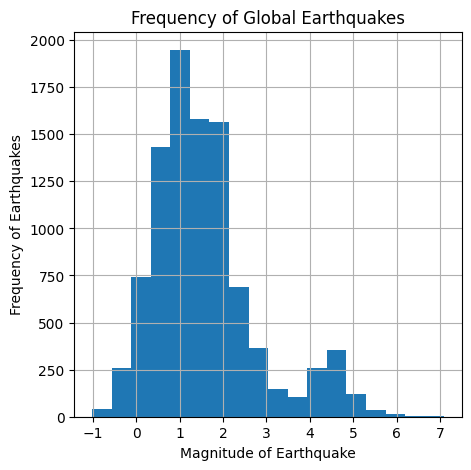

In [155]:
## Creating histogram for all earthquakes and the frequencies
earthquake_data.hist ("mag", bins=18, figsize=(5,5))

## Labelling axes and title
plt.xlabel('Magnitude of Earthquake')
plt.ylabel('Frequency of Earthquakes')
plt.title('Frequency of Global Earthquakes')


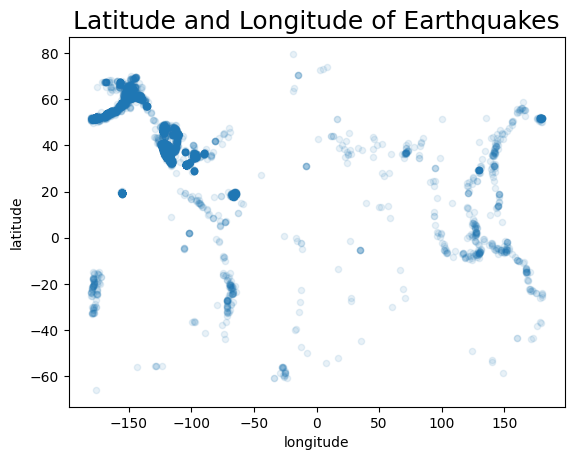

In [83]:
## Creating scatter plot of longitude vs lattitude to map out data
earthquake_data.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)
plt.title('Latitude and Longitude of Earthquakes', fontsize=18)
plt.gca().set_facecolor('none')

In [ ]:
## Attempting to create pie chart: result is too many sections and therefore taking top 5 values
plt.pie(earthquake_data['place'].value_counts())

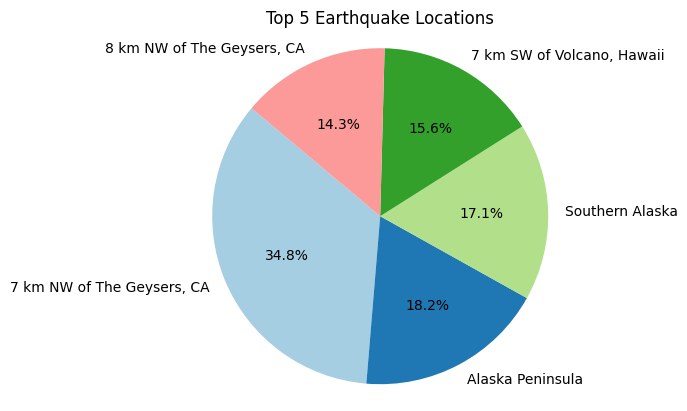

In [145]:
## Get the top 5 locations with the most earthquakes
top_locations = earthquake_data['place'].value_counts().nlargest(5)

## Create a pie chart with different colors
plt.pie(top_locations, labels=top_locations.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

## Set aspect ratio to be equal, creating a circular pie chart
plt.axis('equal')
plt.title('Top 5 Earthquake Locations')

## Display the pie chart
plt.show()

Text(0.5, 1.0, 'Frequency of earthquakes 7 km NW of The Geysers, CA')

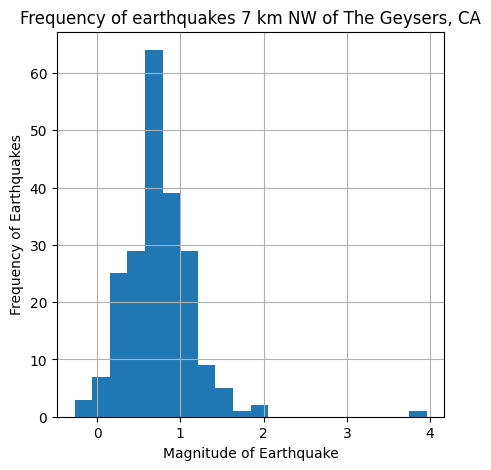

In [188]:
## Creating histogram of earthquakes '7km NW of the Geysers, CA'
eq_7km_geysers = earthquake_data[earthquake_data['place'] == '7 km NW of The Geysers, CA']
eq_7km_geysers.hist ("mag", bins=20, figsize=(5,5))

## Labelling the axes
plt.xlabel('Magnitude of Earthquake')
plt.ylabel('Frequency of Earthquakes')
plt.title('Frequency of earthquakes 7 km NW of The Geysers, CA')

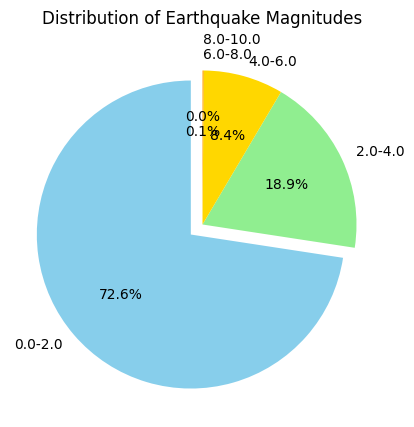

In [187]:
## Obtaining the earthquake magnitudes
magnitudes = earthquake_data['mag']

## Defining the magnitude ranges
bins = [0, 2, 4, 6, 8, 10]

## Creating a histogram to count the number of earthquakes in each magnitude range
hist, edges = np.histogram(magnitudes, bins=bins)

## Labeling the sections
labels = [f'{edges[i]:.1f}-{edges[i+1]:.1f}' for i in range(len(edges)-1)]

## Adding colours to sections
colors = ['skyblue', 'lightgreen', 'gold', 'orange', 'red']

## Exploding smaller sections
explode = (0.1, 0, 0, 0, 0.1)

## Creating a pie chart
plt.figure(figsize=(5, 5))
plt.pie(hist, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Distribution of Earthquake Magnitudes')
plt.show()

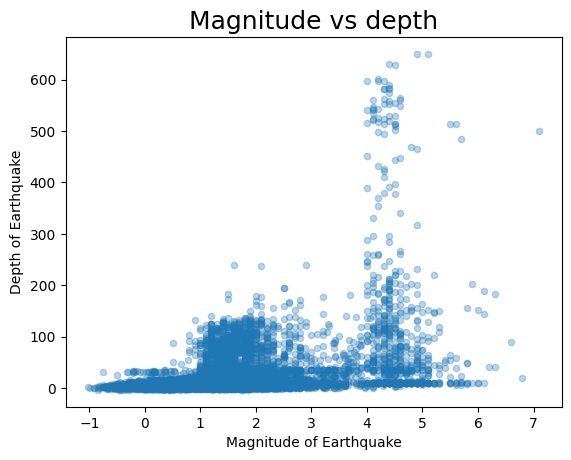

In [189]:
## Creating a scatter plot to see correlation between magnitude and depth
earthquake_data.plot(kind="scatter", x="mag", y="depth", alpha = 0.3)

## Labelling axes and title
plt.xlabel('Magnitude of Earthquake')
plt.ylabel('Depth of Earthquake')
plt.title('Magnitude vs depth', fontsize=18)
plt.gca().set_facecolor('none')

/var/folders/1b/_27b0cdn1tz17xtq6h_bq7mc0000gn/T/ipykernel_12725/302891493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['time'] = pd.to_datetime(location_data['time'])
/var/folders/1b/_27b0cdn1tz17xtq6h_bq7mc0000gn/T/ipykernel_12725/302891493.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_data['date'] = location_data['time'].dt.date
/var/folders/1b/_27b0cdn1tz17xtq6h_bq7mc0000gn/T/ipykernel_12725/302891493.py:8: SettingWithCopyWarning: 
A value is trying to be set on a cop

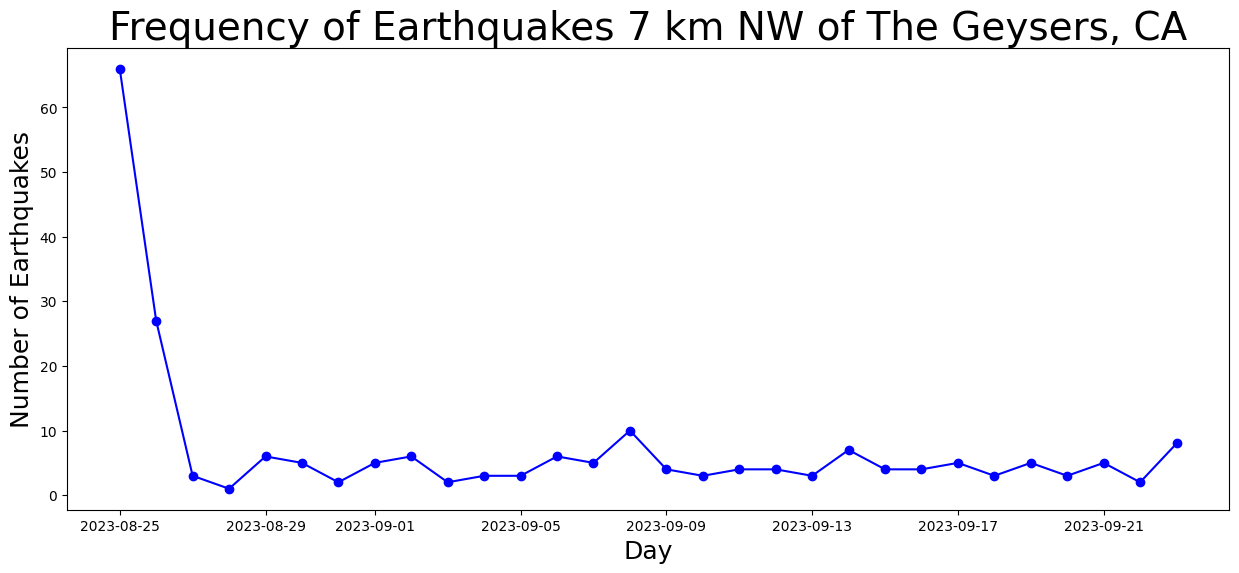

In [172]:
## Filtering data for earthquakes in the specified location
location_data = eq_7km_geysers

## Converting the 'time' column to datetime format
location_data['time'] = pd.to_datetime(location_data['time'])

## Extracting the date andtime
location_data['date'] = location_data['time'].dt.date
location_data['hour'] = location_data['time'].dt.hour

## Grouping date and count the number of earthquakes on each date
daily_counts = location_data.groupby('date').size()

## Creating line graph of number of earthquakes vs days
plt.figure(figsize=(15, 6))
daily_counts.plot(kind='line', marker='o', linestyle='-', color='b')

## Adding labels and title
plt.xlabel('Day', fontsize=18)
plt.ylabel('Number of Earthquakes', fontsize=18)
plt.title('Frequency of Earthquakes 7 km NW of The Geysers, CA', fontsize=28)

## Displaying the line graph
plt.show()